# COVID-19 CT Images Segmentation

This solution is based on [this notebook](https://www.kaggle.com/code/maedemaftouni/pytorch-baseline-for-semantic-segmentation) by Maede Maftouni.

Team 6:
* A01275287 Oskar Adolfo Villa López
* A01736345 Luis Ángel Cruz García
* A01369230 Dafne Fernández Hernández
* A01368818 Joel Sánchez Olvera




# **Introduction**

This notebook addresses a critical problem in medical image segmentation related to COVID-19, aiming to identify and delineate specific lung areas in computed tomography (CT) scans. The segmentation problem focuses on detecting key pulmonary features, such as ground glass opacities and consolidations, which are essential indicators of COVID-19 infection. Accurate segmentation of these areas is crucial for medical diagnoses, as it helps assess the severity of the infection and provides valuable information for disease monitoring and treatment planning.

**The Problem:**

COVID-19 primarily affects the lungs, and CT scans can show telltale signs of infection, like ground glass opacities and consolidations, which indicate inflammation or fluid buildup in the lungs. Accurately segmenting these regions in CT images is critical for diagnosing the severity of the infection and monitoring disease progression. This segmentation task aids in providing visual evidence of affected lung regions, improving clinical diagnosis, and supporting medical treatment decisions.

**Kaggle Competition Objectives**

The Kaggle competition's objective is to develop robust deep learning models capable of accurately segmenting lung regions affected by COVID-19 in CT scans. The relevance of this task is significant in the medical field, as it enhances diagnostic tools and allows healthcare professionals to track disease progression. By providing precise visual information about the extent of lung involvement, these models assist in making informed clinical decisions and improving patient care.

The notebook employs popular segmentation models based on architectures like U-Net and FPN (Feature Pyramid Network), widely used in medical imaging tasks due to their ability to capture both fine and global contextual information. The notebook also makes use of the segmentation_models_pytorch library, which simplifies model building and training by providing pre-trained segmentation backbones.

# **Data Analysis**

**Exploratory Data Analysis (EDA)**

The dataset provided in this competition includes lung CT scans with corresponding segmentation masks. The CT images come from two datasets:

* **Medseg Dataset:**
  
  100 CT images from over 10 patients.

  Corresponding segmentation masks contain four channels:
  
   * Ground glass opacities
   * Consolidations
   * Unaffected lung tissue (Lungs Other)
   * Background.


* **Radiopaedia Dataset:**

  829 CT slices.

  The structure of the images and masks is similar to the Medseg dataset.

Each image has dimensions of 520 x 520 pixels. The segmentation masks label regions of interest in the lungs, including infected areas (ground glass and consolidation) and normal lung tissue. Visualizing these images helps understand the data distribution and the extent of the infection in the lungs.

**Data Preprocessing**

Before training the model, several data preprocessing steps are performed:

* **Resizing:** All images are resized to 520 x 520 pixels to ensure consistency in input dimensions.
* **Normalization:** Pixel values are normalized to a standard range, improving model convergence during training.
* **Data Augmentation:** Techniques such as random rotations, flips, and intensity shifts are applied to increase the dataset's variability, helping the model generalize better to unseen data.

These steps ensure the model can handle different variations in the input data, making it more robust.

# **Model**

**Model Architecture**

The model chosen for this task is based on the U-Net architecture, a popular choice for medical image segmentation due to its symmetrical design and skip connections that retain spatial information.

The U-Net architecture is well-suited for this task because of its ability to accurately segment complex shapes in medical images, such as the lung regions affected by COVID-19. The use of skip connections ensures that the model does not lose important spatial information during downsampling. This makes U-Net an optimal choice for the challenge of identifying intricate lung structures.

The architecture consists of:

* **Encoder:** A series of convolutional layers followed by max-pooling layers to downsample the input image and extract features.
* **Decoder:** Upsampling layers that reconstruct the image to its original resolution while merging feature maps from the encoder via skip connections to retain fine details.
* **Skip Connections:** Allow the model to merge high-level features with low-level spatial information, improving segmentation accuracy for small details.

Other model details:

* **Kernel Size:** The convolutional layers use a standard kernel size of 3x3, with stride 1 and appropriate padding to maintain spatial dimensions.
Max Pooling: Reduces the spatial dimensions of the feature maps while retaining the most important features.
* **Activation Functions:** The model uses ReLU for non-linearity in the convolutional layers and Sigmoid in the output layer for binary segmentation.
* **Cross-Entropy Loss:**
The cross-entropy loss function is used in this model. It measures the difference between the predicted segmentation mask and the ground truth mask by penalizing incorrect classifications for each pixel. Cross-entropy loss is widely used in segmentation tasks due to its effectiveness in dealing with multiple classes and imbalanced datasets.

  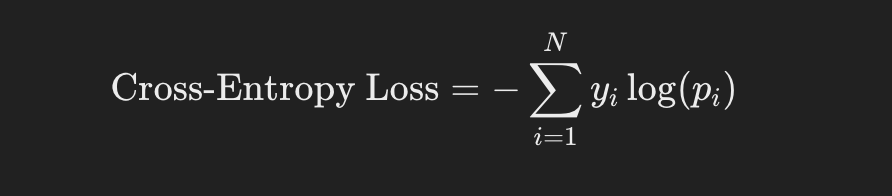



* Where:

  𝑦 is the true label for pixel 𝑖 , and 𝑝 is the predicted probability for that label.





## Ethical implications
The analyzed images were originally obtained from SIRM (Società Italiana di Radiologia Medica e Interventistica), which follows a series of regulations to protect individuals' information and allow its use for academic or scientific purposes. Among these regulations, we can find:

1. D. Lgs. 101/2018: Implements the General Data Protection Regulation (GDPR) in Italy. This is crucial as it sets the rules for processing personal data, including medical images that may contain sensitive information. In this specific case, the following measures must be followed:
  * Anonymization of the images to ensure that patients cannot be identified.
  * Explicit consent from patients to use their images.

2. Legge 219/2017: This law establishes the rules for informed consent and advance treatment directives.

3. Legge 3/2018: Covers aspects of clinical experimentation and the reorganization of healthcare professions.

Also, it's important to emphasize that as a team, we focus not only on finding solutions that enhance our learning, but also on creating real-world applications that can help others. This, in turn, gives us the experience needed to develop more efficient solutions.



## Imports

In [1]:
!pip install segmentation_models_pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.5 MB/s eta 0:00:0000:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=4e3f1516edd807bb83568aa61e372cf5308f0ee55865f098a361d384e2516a8c
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=9dcb409d0004479ae466ce9dbdbbf68d58eee91f626a21e8e89b2cb5e48aa572
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-py

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-segmentation/masks_medseg.npy
/kaggle/input/covid-segmentation/images_medseg.npy
/kaggle/input/covid-segmentation/test_images_medseg.npy
/kaggle/input/covid-segmentation/masks_radiopedia.npy
/kaggle/input/covid-segmentation/images_radiopedia.npy


## Data description

The data used for training comes from two diffrent datasets: Medseg and Radiopedia. All images and mask have a size of 520 x 520. Examples of the images are provided in the **Extraction** section.


---


The Medseg set is made from 100 CT images from more than 40 patients. The set contains the 100 original images and 100 masks with four channels (0 - "ground glass", 1 - "consolidations", 2 - "lungs other", 3 - "background" ). The test set is also taken from this set, and it consists of 10 images.

---


The Radiopedia set follows the same structure of the images and masks. It contains 829 slices from segmented axial volumetric CTs.

## Extraction

The data is extracted from the given repositories. The images are stored in numpy arrays. The images are already formatted and have their masks assigned as labels.

In [3]:
prefix = '/kaggle/input/covid-segmentation/'

images_radiopedia = np.load(os.path.join(prefix, 'images_radiopedia.npy')).astype(np.float32)
masks_radiopedia = np.load(os.path.join(prefix, 'masks_radiopedia.npy')).astype(np.int8)
images_medseg = np.load(os.path.join(prefix, 'images_medseg.npy')).astype(np.float32)
masks_medseg = np.load(os.path.join(prefix, 'masks_medseg.npy')).astype(np.int8)

test_images_medseg = np.load(os.path.join(prefix, 'test_images_medseg.npy')).astype(np.float32)

A function for visalization is defined. The code prints a matriz with the original images in a grey scale in the superior row. The masks are shown in the correspondent column. The masks that are going to be predicted with the model are ground glass and consolidation, the second and third rows respectively.

**Images from radiopedia are full CT volumes:** <br>
Class 0 is "ground glass"<br>
Class 1 is "consolidations"<br>
Class 2 is "lungs other" – it doesn't mean that it is healthy lungs (not needed for analysis)<br>
Class 3 is "background" – not lungs (not needed for analysis)<br>

In [4]:
def visualize(image_batch, mask_batch=None, pred_batch=None, num_samples=8, hot_encode=True):
    num_classes = mask_batch.shape[-1] if mask_batch is not None else 0
    fix, ax = plt.subplots(num_classes + 1, num_samples, figsize=(num_samples * 2, (num_classes + 1) * 2))

    for i in range(num_samples):
        ax_image = ax[0, i] if num_classes > 0 else ax[i]
        if hot_encode:
            ax_image.imshow(image_batch[i,:,:,0], cmap='Greys')
        else:
            ax_image.imshow(image_batch[i,:,:])
        ax_image.set_xticks([])
        ax_image.set_yticks([])

        if mask_batch is not None:
            for j in range(num_classes):
                if pred_batch is None:
                    mask_to_show = mask_batch[i,:,:,j]
                else:
                    mask_to_show = np.zeros(shape=(*mask_batch.shape[1:-1], 3))
                    mask_to_show[..., 0] = pred_batch[i,:,:,j].cpu().numpy() > 0.5
                    mask_to_show[..., 1] = mask_batch[i,:,:,j]
                ax[j + 1, i].imshow(mask_to_show, vmin=0, vmax=1)
                ax[j + 1, i].set_xticks([])
                ax[j + 1, i].set_yticks([])

    plt.tight_layout()
    plt.show()

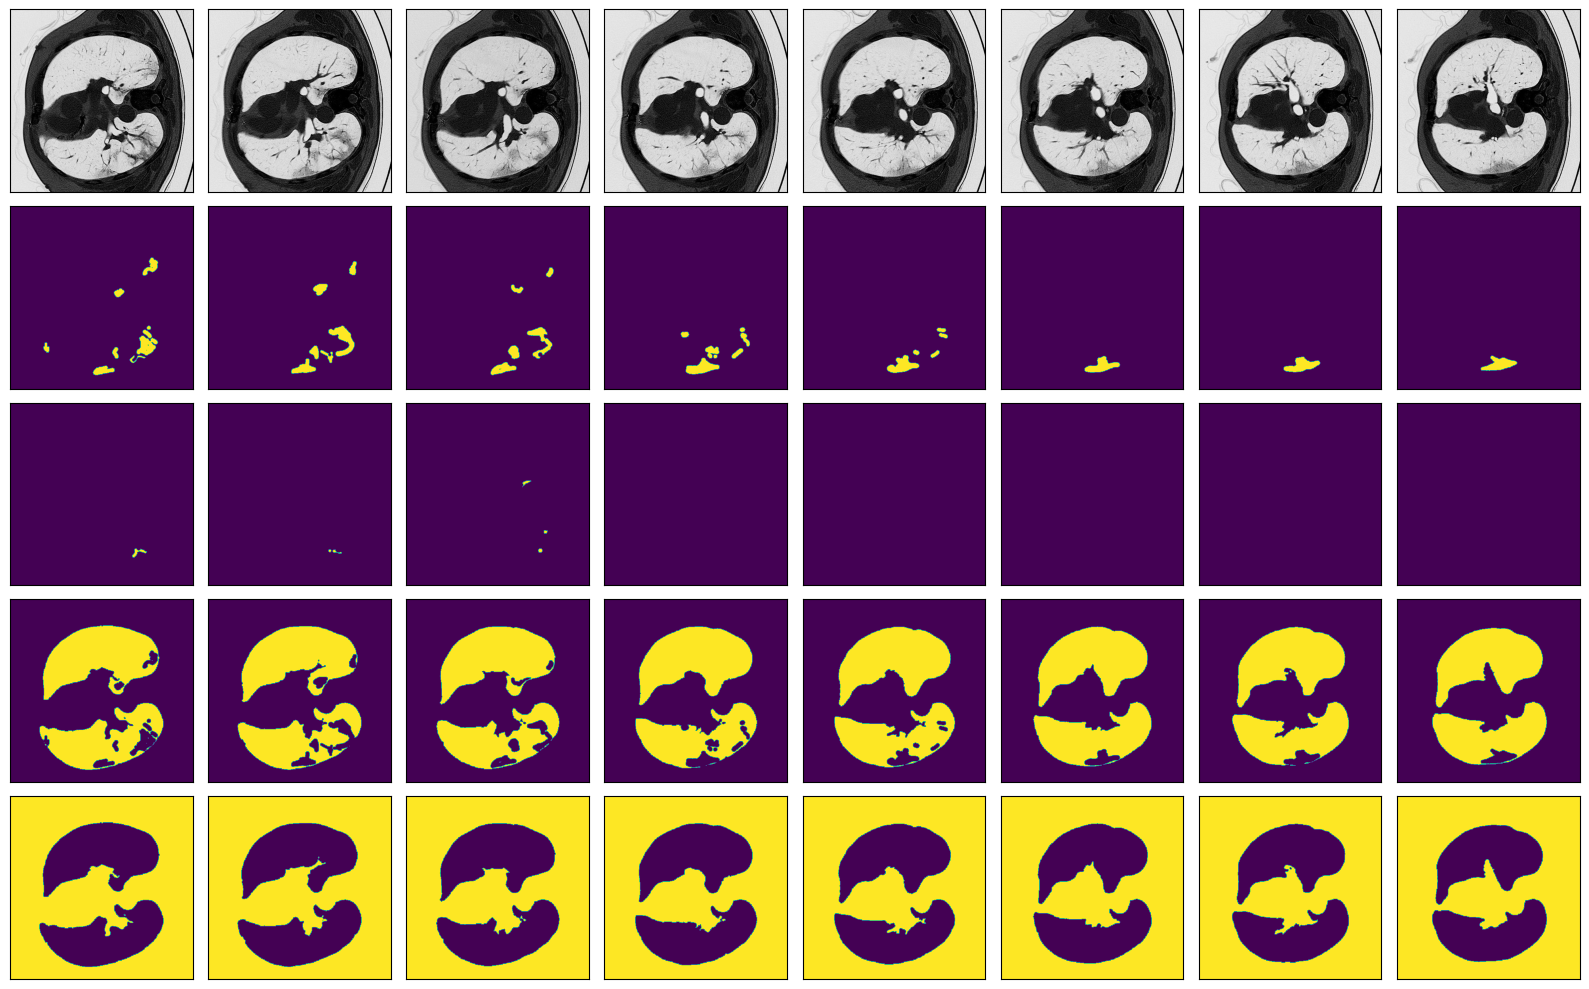

In [5]:
visualize(images_radiopedia[30:], masks_radiopedia[30:])

As we can see, both classes that we want to predict are pretty small compared to the complete image, so we have an important class imbalance.

Then, we define a function to convert the one hot encoded mask to a segmentation mask.

Hot encoded mask size:  (829, 512, 512, 4)
Paletted mask size: (100, 512, 512)


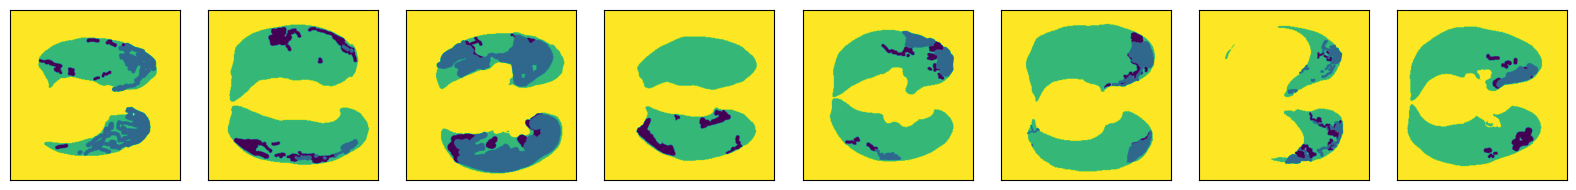

In [6]:
def onehot_to_mask(mask, palette):
    """
    Converts a mask (H, W, K) to (H, W, C)
    """
    x = np.argmax(mask, axis=-1)
    colour_codes = np.array(palette)
    x = np.uint8(colour_codes[x.astype(np.uint8)])
    return x

palette = [[0], [1], [2],[3]]
masks_radiopedia_recover = onehot_to_mask(masks_radiopedia, palette).squeeze()  # shape = (H, W)

masks_medseg_recover = onehot_to_mask(masks_medseg, palette).squeeze()  # shape = (H, W)

print('Hot encoded mask size: ',masks_radiopedia.shape)
print('Paletted mask size:',masks_medseg_recover.shape)

visualize(masks_medseg_recover[30:],hot_encode=False)

Finally, we need to separate the image sets into validation and train. The test set is already provided by the competition. 24 images were selected from the medseg set for validation. The rest of medseg and all of the images from radiopedia were selected for training, with a size of ~800.

In [7]:
masks_radiopedia_recover = onehot_to_mask(masks_radiopedia, palette).squeeze()  # shape = (H, W)
masks_medseg_recover = onehot_to_mask(masks_medseg, palette).squeeze()  # shape = (H, W)


val_indexes, train_indexes = list(range(24)), list(range(24, 100))

train_images = np.concatenate((images_medseg[train_indexes], images_radiopedia))
train_masks = np.concatenate((masks_medseg_recover[train_indexes], masks_radiopedia_recover))
val_images = images_medseg[val_indexes]
val_masks = masks_medseg_recover[val_indexes]

batch_size = len(val_masks)

del masks_medseg_recover
del masks_radiopedia_recover
del images_radiopedia
del masks_radiopedia
del images_medseg
del masks_medseg

## Transform

The training data set is relatively small, with less than 1000 images. To improve the variety of the set, we can apply random transformations to the images, which can reduce overfit and increase the accuracy of the model. The library Albumentations is used for this, because it can apply the same transformation to an image and its corresponding mask. The transformations applied are the following:
* Rotation. With a limit of 360 degrees, which means that the images can be completely rotated. A probability of 90% is given.
* Random sized crop. Crops a portion of the images with a limit of 75% of the original size, and rescales the cropped image to the original size.
* Horizontal flip. With a probability of 50%.

In [8]:
import albumentations

import cv2

SOURCE_SIZE = 512
TARGET_SIZE = 256


train_augs = albumentations.Compose([
    albumentations.Rotate(limit=360, p=0.9, border_mode=cv2.BORDER_REPLICATE),
    albumentations.RandomSizedCrop((int(SOURCE_SIZE * 0.75), SOURCE_SIZE),
                                   TARGET_SIZE,
                                   TARGET_SIZE,
                                   interpolation=cv2.INTER_NEAREST),
    albumentations.HorizontalFlip(p=0.5),

])

val_augs = albumentations.Compose([
    albumentations.Resize(TARGET_SIZE, TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
])

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Load

Now, a dataset object is defined. This object has three methods besides its constructor:
* \_\_getitem\_\_. Returns an item from the dataset after transforming the image to a tensor. It also applies the tranformation defined previously.
* \_\_len\_\_. Returns the length of the dataset.
* tiles. Returns a two tensors containing an image an its mask, where each item is a patch of the original image.

In [9]:
from PIL import Image
import segmentation_models_pytorch as smp
import torch.nn.functional as F
import torch.nn as nn
from tqdm.notebook import tqdm
import time

from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader
import torch

class Dataset:
    def __init__(
            self,
            images,
            masks,
            augmentations=None
    ):
        self.images = images
        self.masks = masks
        self.augmentations = augmentations
        self.mean = [0.485]
        self.std = [0.229]

    def __getitem__(self, i):
        image = self.images[i]
        mask = self.masks[i]


        if self.augmentations is not None:
            sample = self.augmentations(image=image, mask=mask)

            image, mask = Image.fromarray(np.squeeze(sample['image'], axis=2)), sample['mask']

        if self.augmentations is None:
            image = Image.fromarray(image)

        t = T.Compose([T.ToTensor(), T.Normalize(self.mean, self.std)])
        image = t(image)
        mask = torch.from_numpy(mask).long()

        return image, mask

    def __len__(self):
        return len(self.images)

    def tiles(self, image, mask):

        img_patches = image.unfold(1, 512, 512).unfold(2, 768, 768)
        img_patches  = img_patches.contiguous().view(3,-1, 512, 768)
        img_patches = img_patches.permute(1,0,2,3)

        mask_patches = mask.unfold(0, 512, 512).unfold(1, 768, 768)
        mask_patches = mask_patches.contiguous().view(-1, 512, 768)

        return img_patches, mask_patches


train_dataset = Dataset(train_images, train_masks, train_augs)
val_dataset = Dataset(val_images, val_masks, val_augs)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Model

Before defining the model, we need some helper functions for visualization and analysis.

**mask_to_onehot**

We will convert a segmentation mask into a one-hot encoded representation, which is a binary representation where a class is represented with a vector that has a value of 1 at the position corresponding to that class, and 0 at all other positions. We will follow the next steps in the mask_to_onehot function:

1.  An empty list called semantic_map is created that will serve to store the class maps for each color in the palette.
2.  For each color in the palette the mask is compared to the color using. This generates a Boolean matrix indicating where in the image pixels match that color. Then, it is checked if all the color channels match, generating a binary map (H, W) where True indicates that that pixel belongs to the class corresponding to the color of the palette.
This class map is added to the semantic_map list.
3.  The class maps for each color are stacked along a new dimension. This converts semantic_map to a matrix of dimensions (H, W, K), where K is the number of classes. Finally, the result is converted to a float tensor and then to a PyTorch tensor.
4.  The function returns a one-hot encoding tensor of dimensions (H, W, K), where each pixel is represented by a one-hot vector indicating which class it belongs to.

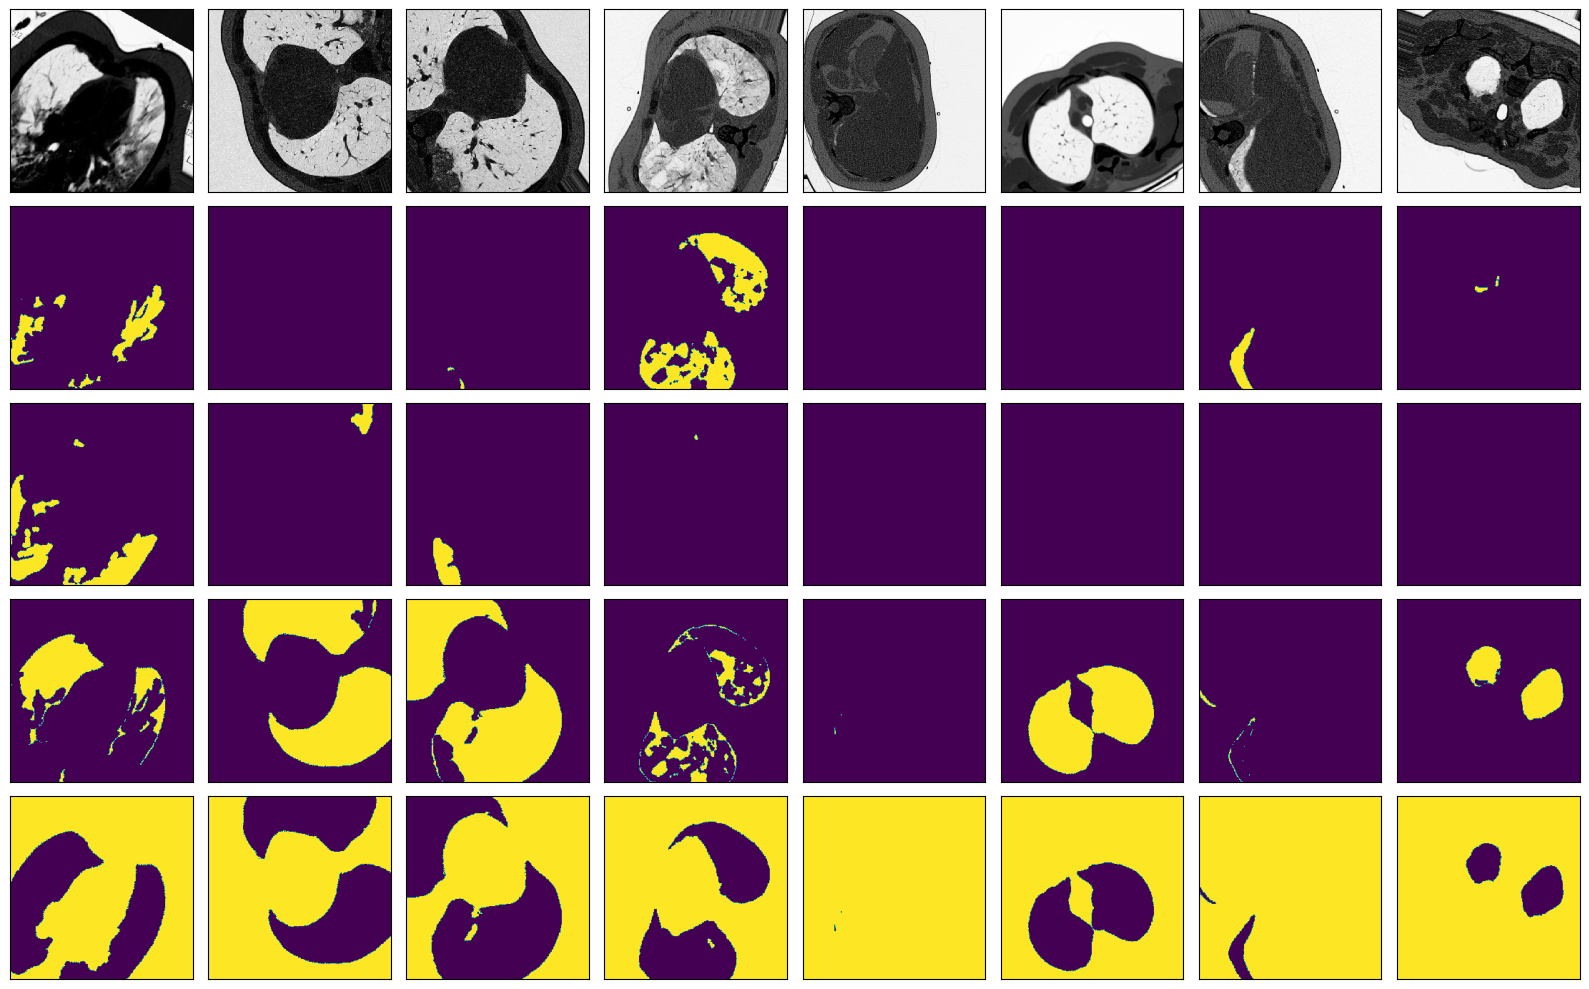

In [10]:
def mask_to_onehot(mask, palette):
    """
    Converts a segmentation mask (H, W, C) to (H, W, K) where the last dim is a one
    hot encoding vector, C is usually 1 or 3, and K is the number of class.
    """
    semantic_map = []
    for colour in palette:
        #print('colour',colour)
        equality = np.equal(mask, colour)
        #print('equality',equality)
        class_map = np.all(equality, axis=-1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1).astype(np.float32)
    return torch.from_numpy(semantic_map)

i,train_data = next(enumerate(train_dataloader))

mask_hot_encoded = mask_to_onehot(torch.unsqueeze(train_data[1],-1).numpy(),palette)
#visualize(torch.unsqueeze(torch.squeeze(train_data[0],1),-1),mask_hot_encoded)
visualize(train_data[0].permute(0, 2, 3,1),mask_hot_encoded)


**pixel_accuracy**

We will compute the pixel-wise accuracy for a predicted segmentation mask by comparing it to the ground truth mask.
Pixel-wise accuracy is a metric used in image segmentation tasks, where the goal is to classify each pixel of an image into a specific category (e.g., sky, tree, road). This metric measures the percentage of pixels in an image that have been correctly classified, that is, those that match the correct label in the reference mask (ground truth).

The steps followed in the pixel_accuracy function are:

1.  The model's output is passed through a softmax activation function to convert it into probabilities for each class at each pixel location.
2.  The class with the highest probability is selected for each pixel using torch.argmax, creating a predicted segmentation mask.
3.  A comparison is made between the predicted mask and the ground truth mask (both now containing class indices), generating a binary matrix where 1 indicates correct predictions and 0 indicates incorrect ones.
4.  The total number of correct predictions is summed, and the result is divided by the total number of pixels in the mask to calculate the pixel-wise accuracy.
5.  The function returns the accuracy as a floating-point value.

In [11]:
def pixel_accuracy(output, mask):
    with torch.no_grad():
        output = torch.argmax(F.softmax(output, dim=1), dim=1)
        correct = torch.eq(output, mask).int()
        accuracy = float(correct.sum()) / float(correct.numel())
    return accuracy

**mIoU**

Mean Intersection over Union (mIoU) is a metric used in image segmentation tasks to evaluate a model's performance. mIoU calculates the average Intersection over Union (IoU) between the predicted and true labels for each class. **IoU** for a specific class is calculated by dividing the number of pixels correctly predicted as that class (intersection) by the total number of pixels belonging to that class in either the prediction or the ground truth (union).

The steps followed in the function are:

1. The model's output is passed through a softmax function to obtain probabilities for each class at each pixel.
2. The class with the highest probability for each pixel is selected using torch.argmax, creating a predicted mask.
3. Both the predicted mask and the ground truth mask are flattened into one-dimensional vectors for easier comparison.
4. A list is initialized to store the IoU for each class.
5. The function loops through each class:
   - It identifies the pixels in the predicted mask that belong to the current class and the corresponding pixels in the ground truth.
   - If there are no pixels of the current class in the ground truth, np.nan is added to the IoU list for that class.
   - Otherwise, the intersection (pixels correctly predicted as that class) and the union (pixels belonging to that class in either mask) are calculated.
   - The IoU for that class is computed by dividing the intersection by the union, and the result is added to the list.
6. Finally, the function returns the average IoU across all classes, ignoring any nan values, which gives the overall mIoU score.

In [12]:
def mIoU(pred_mask, mask, smooth=1e-10, n_classes=4):
    with torch.no_grad():
        pred_mask = F.softmax(pred_mask, dim=1)
        pred_mask = torch.argmax(pred_mask, dim=1)
        pred_mask = pred_mask.contiguous().view(-1)
        mask = mask.contiguous().view(-1)

        iou_per_class = []
        for clas in range(0, n_classes): #loop per pixel class
            true_class = pred_mask == clas
            true_label = mask == clas

            if true_label.long().sum().item() == 0: #no exist label in this loop
                iou_per_class.append(np.nan)
            else:
                intersect = torch.logical_and(true_class, true_label).sum().float().item()
                union = torch.logical_or(true_class, true_label).sum().float().item()

                iou = (intersect + smooth) / (union +smooth)
                iou_per_class.append(iou)
        return np.nanmean(iou_per_class)

**iou**

This function computes the Intersection over Union (IoU) between a predicted segmentation mask (pred) and a ground truth mask (gt). IoU is a metric that measures the overlap between the predicted and true labels for a specific class. It is calculated as the ratio of the intersection (where both masks agree on the class) to the union (where either mask shows the class).

The steps followed in the function are:

1.  The predicted mask (pred) and ground truth mask (gt) are squeezed to remove any unnecessary dimensions, moved to the CPU (if they're on a GPU), and converted to NumPy arrays.
2.  The function converts the predicted mask into a labeled format using the ToLabel() function, which likely assigns class labels to the prediction.
3.  An aggregated matrix (agg) is created by summing the predicted and ground truth masks. Each pixel value in this matrix represents a combination of the predicted and actual classes.
4.  The number of pixels where both pred and gt are 1 (i.e., both predict the same class) is calculated as i, representing the intersection.
5.  The union (u) is calculated as the number of pixels where either pred or gt (or both) are greater than 0, representing pixels where the class is either predicted or present in the ground truth.
6.  If there are no pixels in the union (u == 0), the IoU is set to 1 (perfect match). Otherwise, the IoU is computed as the ratio i/u (intersection over union).

In [13]:
def iou(pred, gt):
    pred = pred.squeeze().cpu().data.numpy()
    pred = ToLabel(pred)
    gt = gt.squeeze().cpu().data.numpy()
    agg = pred + gt
    i = float(np.sum(agg == 2))
    u = float(np.sum(agg > 0))
    if u == 0:
        result = 1
    else:
        result = i/u
    return result

**Expliquen la arquitectura que eligieron para su modelo y justifiquen su selección, e.g. U-NET, u otras arquitecturas de segmentación. Describir exactamente la arquitectura, e.g. número de capas, tamaño de kernel de convolución, stride, padding, max pool, etc.**

In this case, the selected model is a variant of the U-Net architecture using EfficientNet-B2 as the encoder.

EfficientNet-B2 is part of the EfficientNet family, designed to achieve an optimal balance between computational efficiency and accuracy. EfficientNet uses a technique called "compound scaling" to simultaneously adjust the depth (number of layers), width (number of filters), and resolution (input size) of the model. It has also proven to be very effective in image classification tasks, achieving high accuracy in visual feature extraction. The architecture includes high-performance convolution blocks and advanced techniques like depthwise separable convolution that optimize precision.

The encoder in the U-Net with 5 levels of depth allows the model to capture features at different scales. Each additional level in the encoder extracts more complex and abstract features.

The U-Net architecture includes a decoder that increases the resolution of the extracted features using upsampling operations and convolution layers. This allows for the reconstruction of the segmented image from high-level features.

###Characteristics
**EfficientNet-B2 (Encoder)**  
- **Number of layers**: EfficientNet-B2 has a total of 16 convolutional layers in its encoder structure.
- **Convolution kernel size**: EfficientNet-B2 typically uses 3x3 and 5x5 kernels in its main convolutions.  
- **Stride**: The stride varies depending on the layer. In the initial layers of the encoder, the stride is often 2 to quickly reduce the image's dimensionality. In later layers, the stride may be 1 to maintain resolution during deep feature extraction.  
- **Padding**: EfficientNet-B2 uses "same" padding in most of its convolutional layers, meaning the output size remains the same as the input after applying the convolution, preserving the resolution throughout the model.  
- **Max Pooling**: EfficientNet does not explicitly use traditional max pooling operations. Instead, it relies on strided convolutions to reduce the feature resolution, improving the model's computational efficiency.

**U-Net (Decoder)**  
- **Number of layers**: The U-Net decoder has 5 levels, with convolutional layers that progressively increase the image resolution.  
- **Convolution kernel size**: In the U-Net decoder, 3x3 kernels are typically used in the convolution operations to accurately capture features during upsampling.  
- **Stride**: The stride in the decoder is usually 1 to maintain the resolution while reconstructing the segmented image.  
- **Padding**: "Same" padding is used in the decoder's convolutions to ensure that the output resolution matches the input at each layer.  
- **Max Pooling**: U-Net uses upsampling in the decoder instead of max pooling. The resolution is restored using interpolation or transposed convolutions, rather than pooling.



In [14]:
model = smp.Unet('efficientnet-b2',in_channels=1, encoder_weights='imagenet',classes=4, activation=None, encoder_depth=5, decoder_channels=[256, 128, 64, 32, 16])
#decoder_attention_type ='scse'

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b2-8bb594d6.pth
100%|██████████| 35.1M/35.1M [00:00<00:00, 82.6MB/s]


**Fit Function**
We define fit function, this function is responsible for training and evaluating the model on a dataset over a specified number of epochs.


Loss Function (criterion) The criterion argument represents the loss function used to train the model. Here we use a cross-entropy funcion.

Optimizer, Learning Rate, and Scheduler The optimizer, passed as a parameter (optimizer), can be Adam or SGD, and adjusts the model's weights based on the gradients. The learning rate is controlled through the optimizer and can be dynamically adjusted with a scheduler, as seen in scheduler.step(). The function get_lr(optimizer) retrieves the current learning rate and stores it in the lrs list at each training step. In this case we use Adam.

Number of Epochs and Minibatch Size The number of epochs (epochs) defines how many times the model will train over the entire dataset. The minibatch size is determined using train_loader and val_loader, which divide the dataset into minibatches. The batch size is defined when creating the DataLoader.

Regularization Techniques Early stopping: If the validation loss does not improve for 7 consecutive epochs (not_improve == 7), training is stopped to avoid overfitting. Weight decay: Although not explicitly mentioned, this could be included in the optimizer's configuration. Best model saving: The model is saved every time the validation loss decreases (if decrease % 5 == 0), preserving the best-performing model during training. Training Loop Steps Training Phase: The model is put in training mode with model.train(). Each batch of images and masks passes through the model, the loss is calculated, backpropagation is performed with loss.backward(), and the optimizer updates the weights using optimizer.step(). The scheduler adjusts the learning rate after each step with scheduler.step(). Validation Phase: After each epoch, the model is evaluated on the validation set using model.eval(), preventing weight updates. The mIoU metrics and pixel accuracy are calculated for both the training and validation sets, along with the validation loss. Logging and Monitoring After each epoch, the training loss, validation loss, accuracy, and mIoU scores are logged to monitor progress. If the validation loss improves, the model is saved.

This process is designed to train and evaluate a segmentation model, monitoring its performance and adjusting hyperparameters throughout training.

In [15]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit(epochs, model, train_loader, val_loader, criterion, optimizer, scheduler, patch=False):
    #torch.cuda.empty_cache()
    train_losses = []
    test_losses = []
    val_iou = []; val_acc = []
    train_iou = []; train_acc = []
    lrs = []
    min_loss = np.inf
    decrease = 1 ; not_improve=0

    model.to(device)
    fit_time = time.time()
    for e in range(epochs):
        since = time.time()
        running_loss = 0
        iou_score = 0
        accuracy = 0
        #training loop
        model.train()
        for i, data in enumerate(tqdm(train_loader)):
            #training phase
            image_tiles, mask_tiles = data

            image = image_tiles.to(device); mask =mask_tiles.to(device);
            #forward
            output = model(image)

            loss = criterion(output, mask)
            #evaluation metrics
            iou_score += mIoU(output, mask)
            accuracy += pixel_accuracy(output, mask)
            #backward
            loss.backward()
            optimizer.step() #update weight
            optimizer.zero_grad() #reset gradient

            #step the learning rate
            lrs.append(get_lr(optimizer))
            scheduler.step()

            running_loss += loss.item()


        else:
            model.eval()
            test_loss = 0
            test_accuracy = 0
            val_iou_score = 0
            #validation loop
            with torch.no_grad():
                for i, data in enumerate(tqdm(val_loader)):
                    image_tiles, mask_tiles = data

                    image = image_tiles.to(device); mask =mask_tiles.to(device);
                    output = model(image)
                    #evaluation metrics
                    val_iou_score +=  mIoU(output, mask)
                    test_accuracy += pixel_accuracy(output, mask)
                    #loss
                    loss = criterion(output, mask)
                    test_loss += loss.item()

            #calculatio mean for each batch
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(val_loader))


            if min_loss > (test_loss/len(val_loader)):
                print('Loss Decreasing.. {:.3f} >> {:.3f} '.format(min_loss, (test_loss/len(val_loader))))
                min_loss = (test_loss/len(val_loader))
                decrease += 1
                if decrease % 5 == 0:
                    print('saving model...')
                    torch.save(model, 'Unet_efficientnet_b2_mIoU-{:.3f}.pt'.format(val_iou_score/len(val_loader)))


            if (test_loss/len(val_loader)) > min_loss:
                not_improve += 1
                min_loss = (test_loss/len(val_loader))
                print(f'Loss Not Decrease for {not_improve} time')
                if not_improve == 7:
                    print('Loss not decrease for 7 times, Stop Training')
                    break

            #iou
            val_iou.append(val_iou_score/len(val_loader))
            train_iou.append(iou_score/len(train_loader))
            train_acc.append(accuracy/len(train_loader))
            val_acc.append(test_accuracy/ len(val_loader))
            print("Epoch:{}/{}..".format(e+1, epochs),
                  "Train Loss: {:.3f}..".format(running_loss/len(train_loader)),
                  "Val Loss: {:.3f}..".format(test_loss/len(val_loader)),
                  "Train mIoU:{:.3f}..".format(iou_score/len(train_loader)),
                  "Val mIoU: {:.3f}..".format(val_iou_score/len(val_loader)),
                  "Train Acc:{:.3f}..".format(accuracy/len(train_loader)),
                  "Val Acc:{:.3f}..".format(test_accuracy/len(val_loader)),
                  "Time: {:.2f}m".format((time.time()-since)/60))

    history = {'train_loss' : train_losses, 'val_loss': test_losses,
               'train_miou' :train_iou, 'val_miou':val_iou,
               'train_acc' :train_acc, 'val_acc':val_acc,
               'lrs': lrs}
    print('Total time: {:.2f} m' .format((time.time()- fit_time)/60))
    return history

### Use GPU

A GPU device is used for training the set, as it speeds up the process, paralelizing the computations. The training was made in Kaggle, using the GPU P100 accelerator.

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



### Find max_lr

To find the optimal max learning rate, the model was trained using different values for learning rate, starting from $ 1 \times 10^{-8} $ to 10. This technique is inspired by a paper published by Leslie N. Smith, called *Cyclical Learning Rates for Training Neural Networks*. The values for the loss at each iteration are stored, using a smoother function to reduce noise. The criterion function, as well as the optimizer are the same ones used for training.


  0%|          | 0/38 [00:00<?, ?it/s]

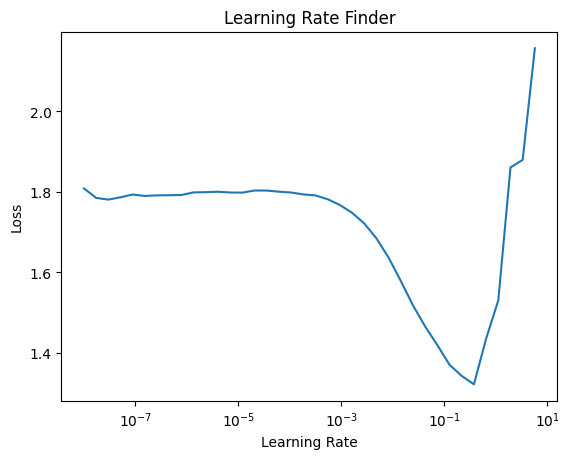

In [17]:

def find_lr(model, train_loader, criterion, optimizer, init_value=1e-8, final_value=10.0, beta=0.98):
    num_iter = len(train_loader)
    lr_values = []
    losses = []
    avg_loss = 0
    best_loss = float('inf')

    model.to(device)

    for i, (images, masks) in enumerate(tqdm(train_loader)):
        images = images.to(device)
        masks = masks.to(device)

        lr = init_value * (final_value / init_value) ** (i / num_iter)
        optimizer.param_groups[0]['lr'] = lr
        lr_values.append(lr)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        avg_loss = beta * avg_loss + (1 - beta) * loss.item()
        smoothed_loss = avg_loss / (1 - beta ** (i + 1))
        losses.append(smoothed_loss)

        if smoothed_loss > 4 * best_loss or torch.isnan(loss):
            return lr_values, losses

        if smoothed_loss < best_loss:
            best_loss = smoothed_loss

        loss.backward()
        optimizer.step()

    return lr_values, losses

def plot_lr_finder(lr_values, losses):
    """
    Plots the learning rate finder results.

    Args:
        lr_values: A list of learning rates.
        losses: A list of losses.
    """
    plt.plot(lr_values, losses)
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')
    plt.title('Learning Rate Finder')
    plt.show()

model_lr = smp.Unet('efficientnet-b2',in_channels=1, encoder_weights='imagenet',classes=4, activation=None, encoder_depth=5, decoder_channels=[256, 128, 64, 32, 16])
#decoder_attention_type ='scse'
weight_decay = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model_lr.parameters(), weight_decay=weight_decay)
# Find the optimal learning rate
lr_values, losses = find_lr(model_lr, train_dataloader, criterion, optimizer)

# Plot the results
plot_lr_finder(lr_values, losses)


To better visualize the data, we can use the rate of change in loss. The point in the graph with the lowest rate of change is the point were the loss decreasses the most, which would be our max learning rate.

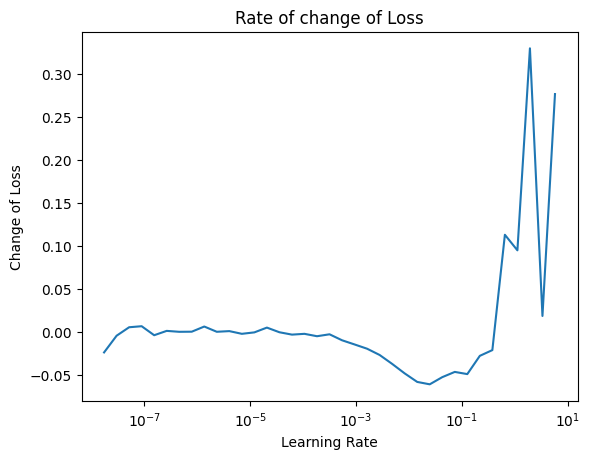

Learning Rate corresponding to the highest negative change of the loss: 0.024816289228368253


In [18]:
# Calculate the derivative of the loss
diff = np.diff(losses)

# Adjust lr_values to match the length of diff
adjusted_lr_values = lr_values[1:]

# Plot the derivative
plt.plot(adjusted_lr_values, diff)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Change of Loss')
plt.title('Rate of change of Loss')
plt.show()

# Find the index of the minimum derivative
min_diff_index = np.argmin(diff)

# Find the corresponding learning rate
min_diff_lr = adjusted_lr_values[min_diff_index]

# Print the learning rate corresponding to the lowest derivative of the loss
print("Learning Rate corresponding to the highest negative change of the loss:", min_diff_lr)


### Training

The max learning rate was found in the steps before. The epochs were found by trial and error, 15 being a number were overfitting was minimum and the metrics were higher.

**Optimizer**  
The optimizer used is Adam. This optimizer accelerates the gradient descent. It was chosen because it is one of the most used optimizers.

**Loss function / Criterion**  
The loss funtion used is Cross Entropy. It is the loss function recomended for neural networks.

**Regularization**  
The optimizer implements a weight decay regularization. Weight decay is a technique used to reduce overfitting by penalizing large weights in the network.

In [19]:
max_lr = 3e-2
epoch = 15
weight_decay = 1e-4

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=max_lr, weight_decay=weight_decay)
sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epoch,
                                            steps_per_epoch=len(train_dataloader))

history = fit(epoch, model, train_dataloader, val_dataloader, criterion, optimizer, sched)

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. inf >> 1.671 
Epoch:1/15.. Train Loss: 0.553.. Val Loss: 1.671.. Train mIoU:0.403.. Val mIoU: 0.240.. Train Acc:0.846.. Val Acc:0.754.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Not Decrease for 1 time
Epoch:2/15.. Train Loss: 0.096.. Val Loss: 35413.980.. Train mIoU:0.513.. Val mIoU: 0.180.. Train Acc:0.969.. Val Acc:0.721.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 35413.980 >> 1292.493 
Epoch:3/15.. Train Loss: 0.077.. Val Loss: 1292.493.. Train mIoU:0.578.. Val mIoU: 0.051.. Train Acc:0.974.. Val Acc:0.203.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Not Decrease for 2 time
Epoch:4/15.. Train Loss: 0.115.. Val Loss: 689305.500.. Train mIoU:0.515.. Val mIoU: 0.051.. Train Acc:0.962.. Val Acc:0.203.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 689305.500 >> 550.439 
Epoch:5/15.. Train Loss: 0.081.. Val Loss: 550.439.. Train mIoU:0.522.. Val mIoU: 0.054.. Train Acc:0.971.. Val Acc:0.211.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 550.439 >> 2.565 
saving model...
Epoch:6/15.. Train Loss: 0.070.. Val Loss: 2.565.. Train mIoU:0.583.. Val mIoU: 0.245.. Train Acc:0.976.. Val Acc:0.755.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Not Decrease for 3 time
Epoch:7/15.. Train Loss: 0.069.. Val Loss: 26.020.. Train mIoU:0.592.. Val mIoU: 0.180.. Train Acc:0.976.. Val Acc:0.721.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 26.020 >> 0.728 
Epoch:8/15.. Train Loss: 0.062.. Val Loss: 0.728.. Train mIoU:0.599.. Val mIoU: 0.426.. Train Acc:0.977.. Val Acc:0.859.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 0.728 >> 0.370 
Epoch:9/15.. Train Loss: 0.051.. Val Loss: 0.370.. Train mIoU:0.614.. Val mIoU: 0.476.. Train Acc:0.981.. Val Acc:0.896.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 0.370 >> 0.254 
Epoch:10/15.. Train Loss: 0.050.. Val Loss: 0.254.. Train mIoU:0.620.. Val mIoU: 0.534.. Train Acc:0.981.. Val Acc:0.928.. Time: 0.22m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Not Decrease for 4 time
Epoch:11/15.. Train Loss: 0.048.. Val Loss: 0.383.. Train mIoU:0.627.. Val mIoU: 0.479.. Train Acc:0.981.. Val Acc:0.910.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 0.383 >> 0.217 
Epoch:12/15.. Train Loss: 0.046.. Val Loss: 0.217.. Train mIoU:0.637.. Val mIoU: 0.559.. Train Acc:0.982.. Val Acc:0.933.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 0.217 >> 0.207 
saving model...
Epoch:13/15.. Train Loss: 0.042.. Val Loss: 0.207.. Train mIoU:0.640.. Val mIoU: 0.566.. Train Acc:0.983.. Val Acc:0.935.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 0.207 >> 0.196 
Epoch:14/15.. Train Loss: 0.042.. Val Loss: 0.196.. Train mIoU:0.647.. Val mIoU: 0.573.. Train Acc:0.983.. Val Acc:0.936.. Time: 0.23m


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss Decreasing.. 0.196 >> 0.192 
Epoch:15/15.. Train Loss: 0.041.. Val Loss: 0.192.. Train mIoU:0.644.. Val mIoU: 0.575.. Train Acc:0.983.. Val Acc:0.937.. Time: 0.23m
Total time: 3.40 m


In [20]:
torch.save(model, 'Unet-efficientnet.pt')

After training the model, we can see the plots for loss, mean iou and accuracy

In [21]:
def plot_loss(history):
    plt.plot(history['val_loss'], label='val', marker='o')
    plt.plot( history['train_loss'], label='train', marker='o')
    plt.title('Loss per epoch'); plt.ylabel('loss');
    plt.xlabel('epoch')
    plt.legend(), plt.grid()
    plt.show()

def plot_score(history):
    plt.plot(history['train_miou'], label='train_mIoU', marker='*')
    plt.plot(history['val_miou'], label='val_mIoU',  marker='*')
    plt.title('Score per epoch'); plt.ylabel('mean IoU')
    plt.xlabel('epoch')
    plt.legend(), plt.grid()
    plt.show()

def plot_acc(history):
    plt.plot(history['train_acc'], label='train_accuracy', marker='*')
    plt.plot(history['val_acc'], label='val_accuracy',  marker='*')
    plt.title('Accuracy per epoch'); plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(), plt.grid()
    plt.show()

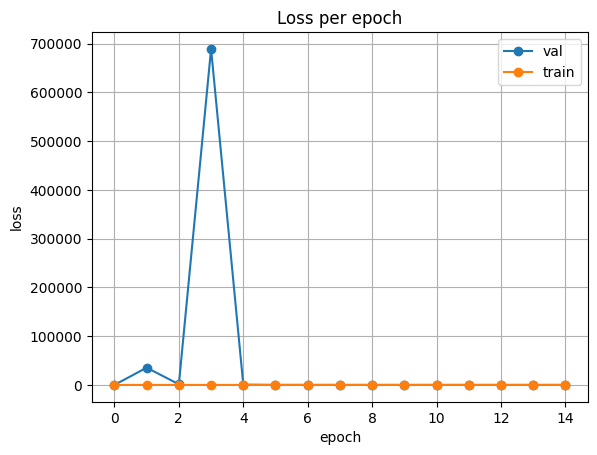

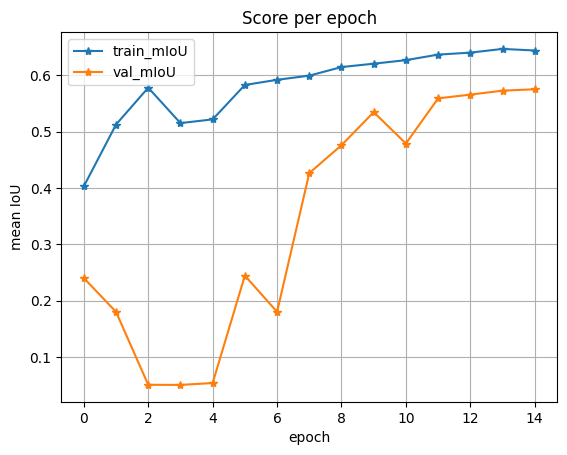

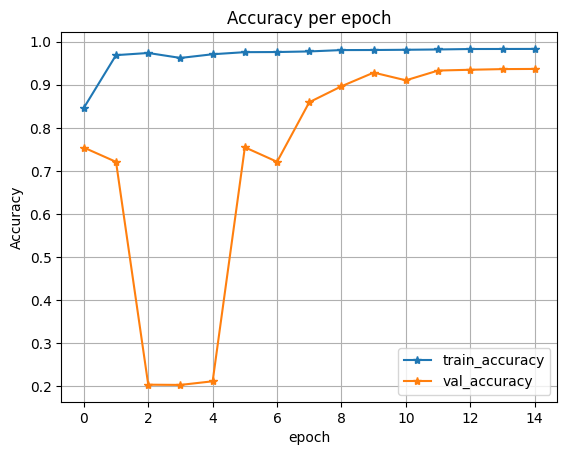

In [22]:
plot_loss(history)
plot_score(history)
plot_acc(history)

## Evaluation metrics

**Loss:** The first graph shows the behavior of the loss over epochs for both training and validation. The loss seems extremely high in the first epoch of validation and then drops almost to zero. This indicates that the model quickly adjusts to the images.

**mIoU (Mean Intersection over Union)**: The second graph shows the mIoU, which measures the overlap between the predicted and ground truth areas for segmentation. This metric is particularly important in image segmentation tasks because it is more robust for evaluating the overlap between the segmented and actual areas. Both training and validation sets have some variation before the 8th epoch, where both start to increase steadily.

**Accuracy**: The third graph displays the model’s accuracy, measuring the percentage of correctly segmented pixels. The results show a small gap between training accuracy. Although accuracy is useful, it is not ideal for segmentation tasks where the background class (non-lesion) might dominate the evaluation.

# Results

Next, we create a function to predict a mask for an image , the fucntion sets. the model to evaluation mode to stop the training, it makes predictions using the model, it calculates the mIoU score and finally returns the predicted mask and the score.

In [23]:
def predict_image_mask_miou(model, image, mask, mean=[0.485], std=[0.229]):
    model.eval()
    model.to(device); image=image.to(device)
    mask = mask.to(device)


    with torch.no_grad():
        output = model(image)
        a,b,c,d = output.shape
        score = mIoU(output, mask)
        masked = torch.argmax(output, dim=1)
        masked = masked.cpu().squeeze(0)
    return masked, score, output.permute(0, 2, 3,1)




Then we need another function, that works similalry to the previous one, but instead of calculating the mIoU, it checks how many individual pixels the model predicted correclty, using the metric pixel_accuracy.

In [24]:
def predict_image_mask_pixel(model, image, mask, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    model.eval()
    model.to(device); image=image.to(device)
    mask = mask.to(device)
    with torch.no_grad():

        output = model(image)
        acc = pixel_accuracy(output, mask)
        masked = torch.argmax(output, dim=1)
        masked = masked.cpu().squeeze(0)
    return masked, acc


Using another function, mask_to_onehot function converts a colored mask into one-hot encoding.

In [25]:
def mask_to_onehot(mask, palette):
    """
    Converts a segmentation mask (H, W, C) to (H, W, K) where the last dim is a one
    hot encoding vector, C is usually 1 or 3, and K is the number of class.
    """
    semantic_map = []
    for colour in palette:
        equality = np.equal(mask, colour)
        class_map = np.all(equality, axis=-1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1).astype(np.float32)
    return torch.from_numpy(semantic_map)

Using the functions defined above, we fetch a batch of images and masks from the validation dataset and pass the image through the model to predict the mask

In [26]:
image, mask = next(iter(val_dataloader))

We then calculate the mIoU score to se how well the predicted mask overlaps with the actual mask, and convert the true mask to one-hot encoding.

In [27]:
pred_mask, score,output = predict_image_mask_miou(model, image, mask)
semantic_map = mask_to_onehot(torch.unsqueeze(mask,-1).cpu().numpy(),palette)

We finally visualize our results.

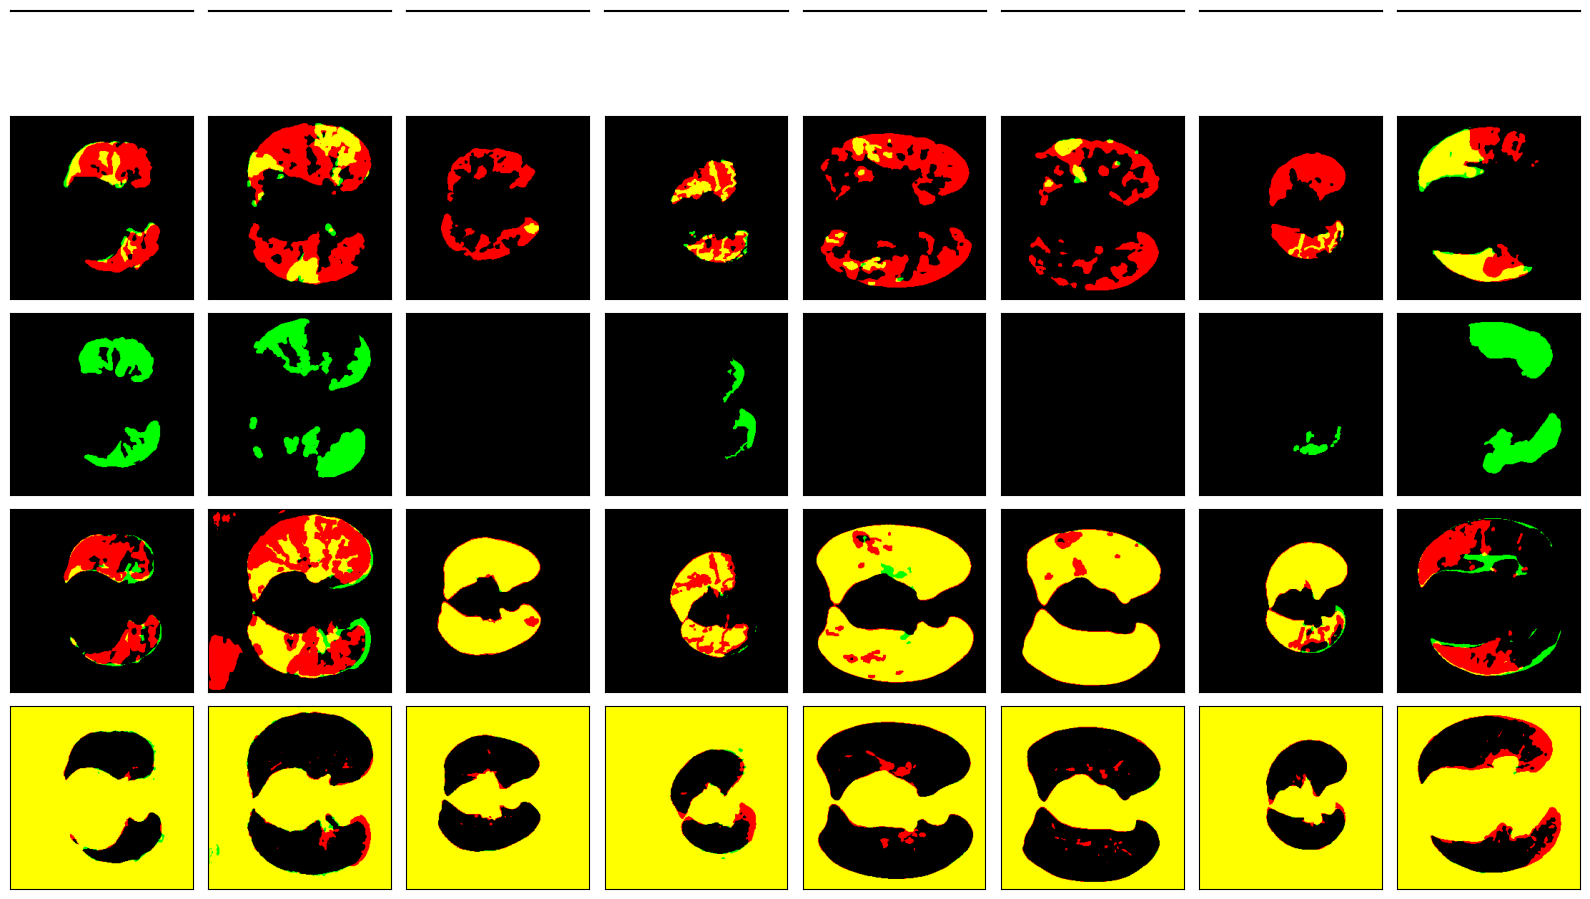

In [28]:
visualize(image, semantic_map, pred_batch=output)

* Yellow: Pixels where both model prediction and true masking are enabled for a specific class. This means that the model has been correct in its prediction for those pixels.
* Red: The pixels where the model prediction is positive (that is, the model predicts the class), but the true mask is negative. This means that the model has incorrectly identified these pixels as belonging to the class when in fact they are not.
* Green: Pixels where the true mask is positive (that is, the pixels actually belong to the class), but the model prediction is negative. This means that the model has not correctly identified these pixels that should have been classified as part of the class.

We can notice that there is a considerable amount of correct values ​​with respect to the Ground Truth, however, we can notice that there are several red pixels, which means that values ​​are being identified in a class when they really are not.

After analyzing, we create a function to calculate the mIoU score for every image in the validation/test set. It loops over the dataset and predicts the mask for each image and calculates their score, it then stores this score in a list which provide an insight on how the model performs accross all images in the test set.

In [29]:
def miou_score(model, test_set):
    score_iou = []
    for i, data in enumerate(tqdm(test_set)):
        img, mask = data
        pred_mask, score,output = predict_image_mask_miou(model, img, mask)
        score_iou.append(score)
    return score_iou

mob_miou = miou_score(model, val_dataloader)
mob_miou



  0%|          | 0/1 [00:00<?, ?it/s]

[0.5751055064967087]

We clean up the training data

In [30]:
del train_images
del train_masks

Then we create a function to normalize and predict the mask for a single image in the test set. using a softmax function to normalize the output probabilities. We then reshape the predicted mask to match the expected shape for processing.


In [31]:
def test_predict(model, image, mean=[0.485], std=[0.229]):
    t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
    image = t(image)
    model.eval()

    model.to(device); image=image.to(device)

    with torch.no_grad():
        output = model(torch.unsqueeze(image,1))
        output = nn.Softmax(dim=1)(output)
    return output.permute(0, 2, 3,1)

We then process a batch of images from the test set and predict masks for each image in the batch, converting them from tensors to arrays. The predicted masks are thresholded to 0.5 and the final masks are displayed along the input images

torch.Size([10, 256, 256, 1])
(256, 256, 1)
(10, 256, 256, 4)


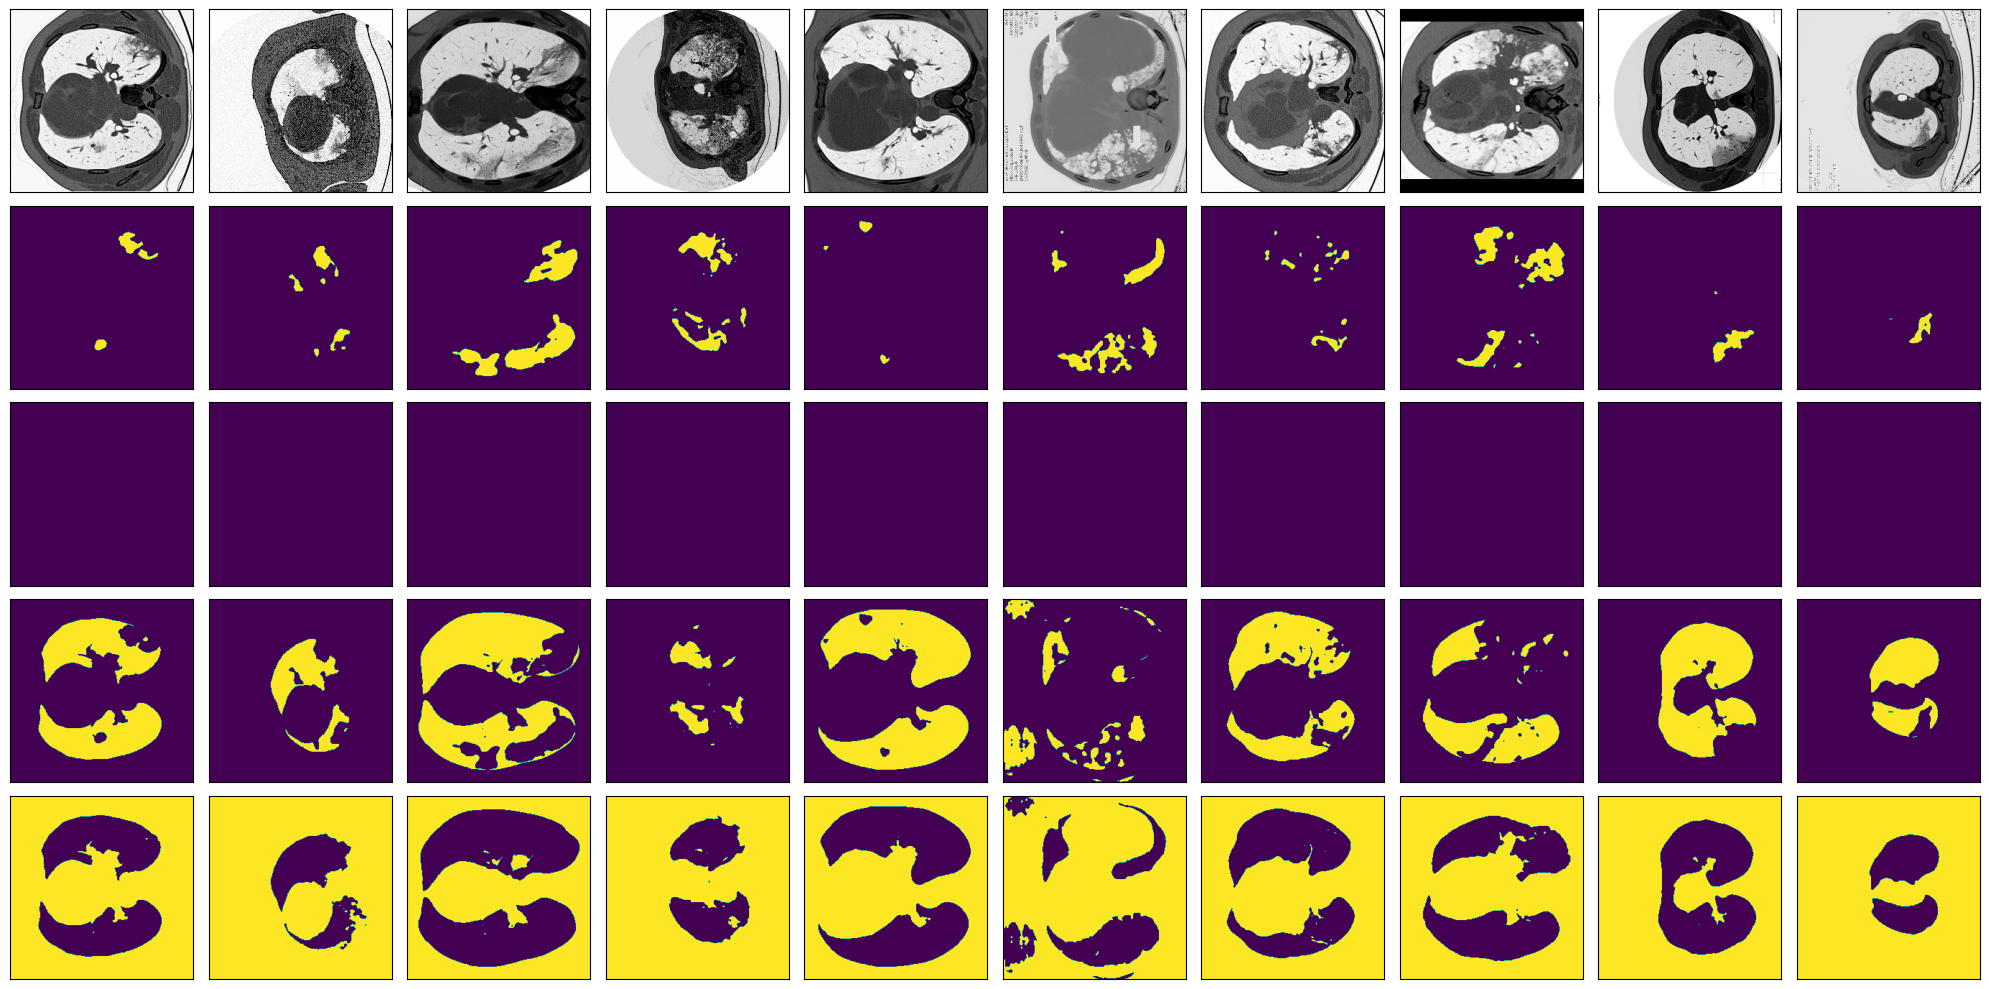

In [32]:
image_batch = np.stack([val_augs(image=img)['image'] for img in test_images_medseg], axis=0)
print(torch.from_numpy(image_batch).shape)
print(image_batch[i].shape)
#output = test_predict(model, torch.from_numpy(image_batch).permute(0, 3, 1,2))
output = np.zeros((10,256,256,4))
for i in range(10):
    output[i] = test_predict(model, image_batch[i]).cpu().numpy()
print(output.shape)
test_masks_prediction = output > 0.5
visualize(image_batch, test_masks_prediction, num_samples=len(test_images_medseg))

Finally, we resize the predicted masks using scipy,with the goal to enlarge the predicted masks to match the original image size or resolution.

In [33]:
import scipy
test_masks_prediction_original_size = scipy.ndimage.zoom(test_masks_prediction[..., :-2], (1, 2, 2, 1), order=0)
test_masks_prediction_original_size.shape

(10, 512, 512, 2)

Then we flatten the masks predicted to a one-dmensional array, we transform the data to a DataFrame and save it as a CSV File, the content of the file will have the index  and the predicted mask values for each pixel

In [34]:
import pandas as pd

pd.DataFrame(
             data=np.stack((np.arange(len(test_masks_prediction_original_size.ravel())),
                            test_masks_prediction_original_size.ravel().astype(int)),
                            axis=-1),
             columns=['Id', 'Predicted'])\
.set_index('Id').to_csv('sub.csv')

# *Conclusions*

*Regarding the obtained results, it can be observed that the model shows a good ability to correctly identify the infected regions in lung images, thus demonstrating its precision in detecting significant areas. It achieves correct predictions, where the model is able to segment both small and large areas for a reliable medical diagnosis. However, some areas with incorrectly predicted infections can also be observed. This may be due to the complexity of the images, where normal tissue can appear similar to infected areas under certain conditions. The same issue arises when predicting infected areas, where the model sometimes shows this behavior in image sections that are too small or where the infection is not very visible.
Overall, the model proved to be effective for lung image segmentation. The identified errors highlight key areas for future improvements, such as adjusting the loss function to better balance the prediction of small infected areas and implementing post-processing techniques to eliminate false positives.*
*In conclusion, the image results reveal several key observations where false positives can be identified. The model marks areas as infected when they are not. These incorrect predictions, represented in red, appear in various columns and different parts of the images. This suggests that the model might be over-predicting certain regions, indicating that it is detecting patterns that do not actually correspond to COVID-19-affected areas. False positives are a sign that the model may be overfitting the data, meaning it is becoming too specific to the training data and not generalizing well.*

*On the other hand, there are also false negatives, reflected in the green areas of the images, where the model did not correctly detect infected areas that should have been marked. Although false negatives do not seem as significant compared to false positives, their presence suggests that the model is not capturing all affected areas well, especially those that might be small or difficult to detect.*

*Despite these errors, there are many areas where the model made correct predictions, particularly in the last rows of the images, where the yellow areas indicate a good match between the prediction and the ground truth mask. This is a positive sign that the model has a solid understanding of the key features of lung infection, achieving effective segmentation in many of the images.*

## References

Radiopedia source (images): https://radiopaedia.org/articles/covid-19-4?lang=us

Medseg source (images): https://sirm.org/en/

Lr tunning : https://arxiv.org/abs/1506.01186

Unet: Ronneberger, O., Fischer, P., & Brox, T. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation (arXiv:1505.04597). arXiv.
https://doi.org/10.48550/arXiv.1505.04597

Ethical implications: Società Italiana di Radiologia Medica e Interventistica (2024). Archivio Documenti. Normativa. https://sirm.org/documenti/